<a href="https://colab.research.google.com/github/Ashimpaul/Git-hub/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import seaborn as sns
sns.set()

sales = pd.read_csv('/content/Walmart.csv')
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


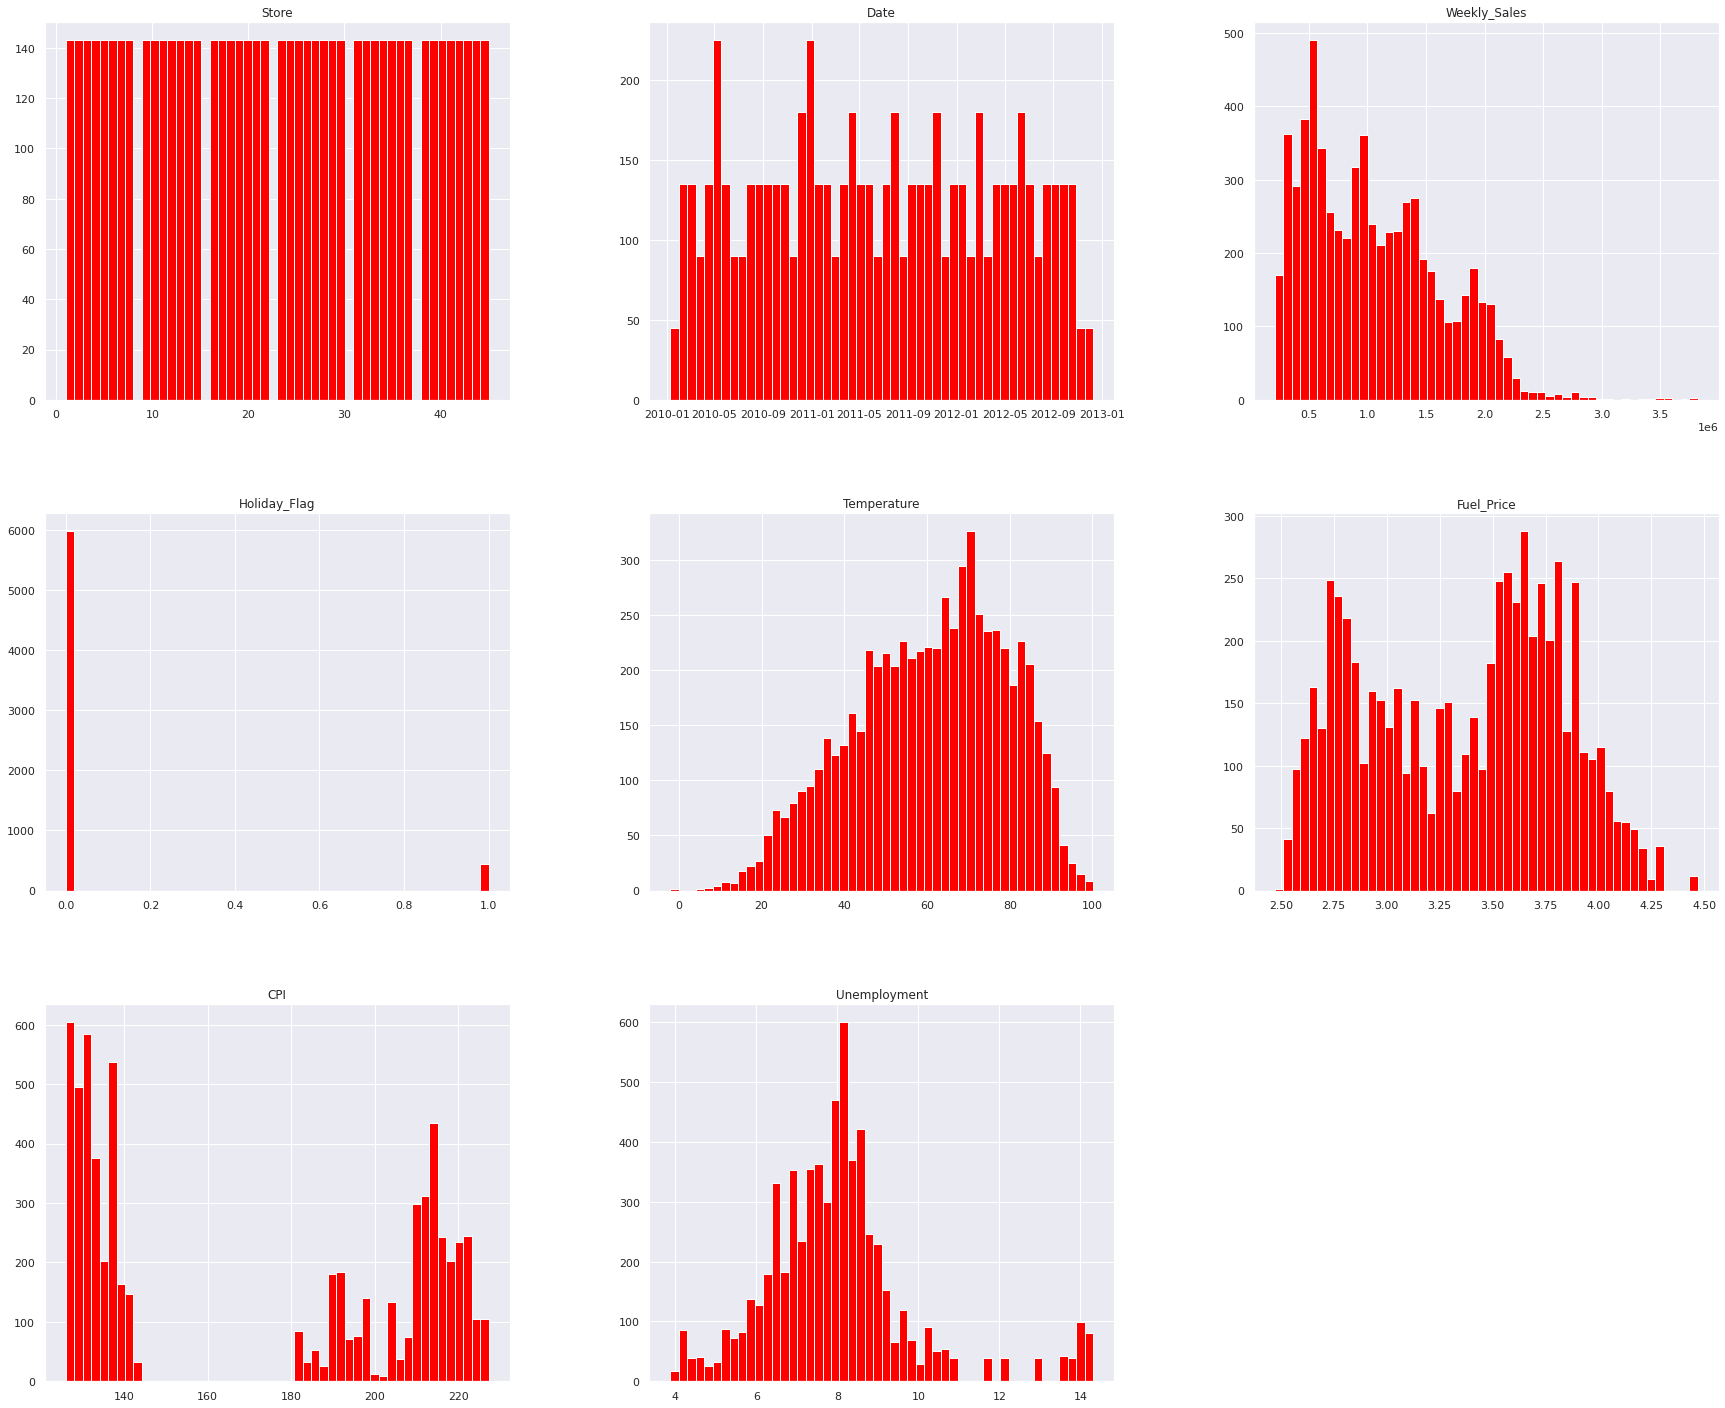

In [ ]:
# histograms
#sales.hist(figsize=(40,20),color = 'red');
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
sales['Date'] = pd.to_datetime(sales.Date)
sales.hist(bins=50,color='red', figsize =(30,25))
plt.show()

In [ ]:
x=sales.iloc[:,1]
y=sales.iloc[:,2]

#print(x,y)

sales['Date'] = pd.to_datetime(sales.Date)

# calculate the employment rate
sales['Employment'] = 100 - sales['Unemployment']

# split the date column
sales['Year']= sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['Day'] = sales['Date'].dt.day
sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


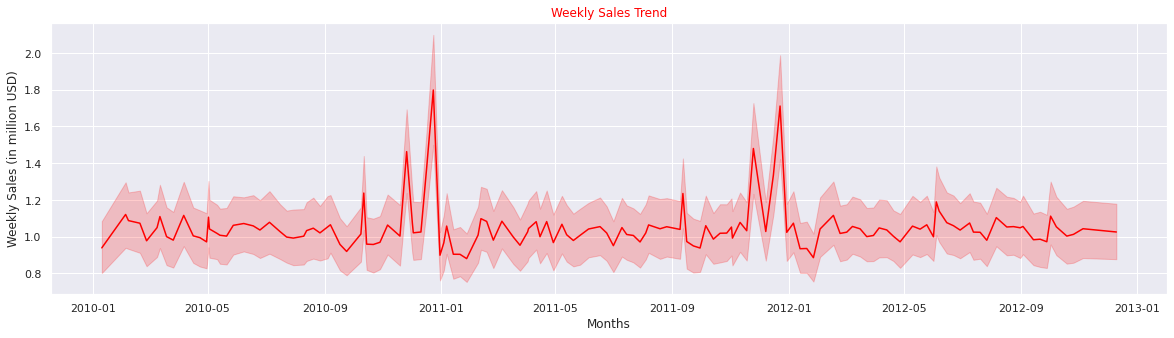

In [ ]:
# plot the line chart of the weekly_sales
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=sales.Date, y=(sales.Weekly_Sales/1e6),color='red')
plt.xlabel('Months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend', color='red')
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points")
annot.set_visible(False)
plt.show()

In [ ]:
pivot_table= sales.pivot_table(index='Month', columns='Year', values ='Weekly_Sales')
pivot_table

Year,2010,2011,2012
Month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


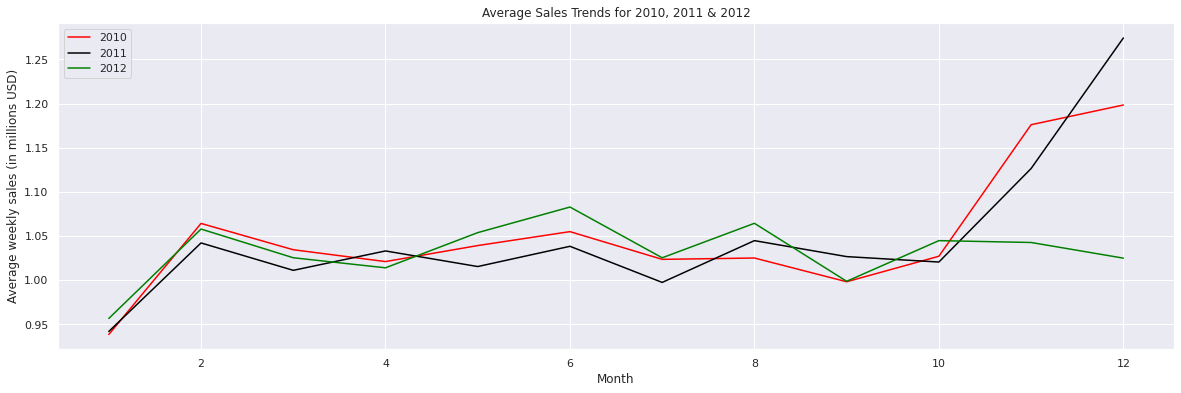

In [ ]:
# create the pivot table
pivot_table = sales.pivot_table(index='Month', columns='Year', values='Weekly_Sales')

# plot the average sales
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot( x=pivot_table.index, y=pivot_table[2010]/1e6, label='2010', color ='red')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, label='2011', color ='black')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, label='2012', color ='Green')
plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012')
plt.show()

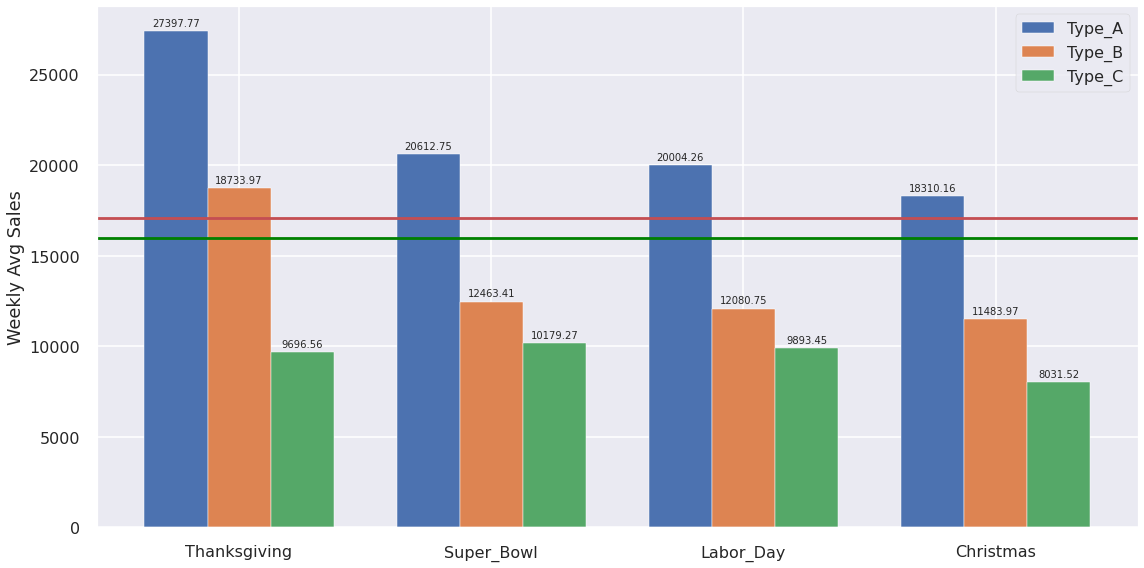

In [ ]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg
fig.tight_layout()
plt.show()

In [ ]:
# make a copy of the dataset
sales_copy = sales.copy()
# drop the date and unemployment columns
sales_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
sales_copy.head()

X = sales_copy.drop('Weekly_Sales', axis=1)
y = sales_copy['Weekly_Sales']

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

In [ ]:
corr_matrix = sales.corr()
corr_matrix['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Employment      0.106176
Month           0.067535
Holiday_Flag    0.036891
Fuel_Price      0.009464
Day            -0.014873
Year           -0.018378
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36281ab490>,
      dtype=object)

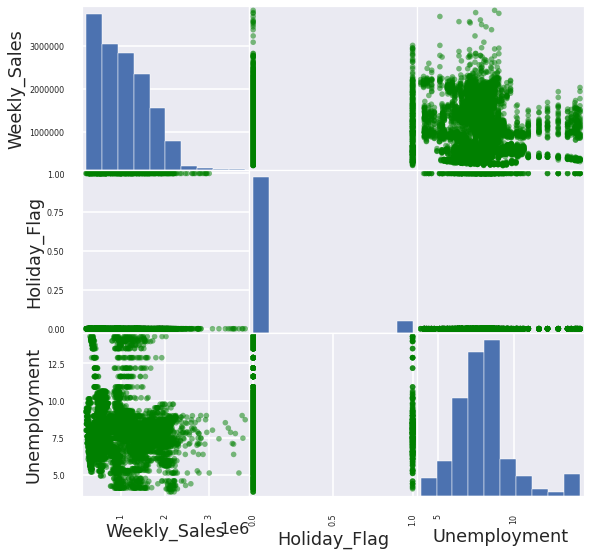

In [ ]:
from inspect import Attribute
from pandas.plotting import  scatter_matrix
Attributes = ["Weekly_Sales","Holiday_Flag", "Unemployment"]
scatter_matrix(sales[Attributes],color='green',figsize=(9,9))

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
      # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
      # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]   
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses)) 
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')  
    # reset the index of the dataframe
    df = df.reset_index()  
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']   
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

In [ ]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
support_vector_regressor = SVR()
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor,decision_tree_regressor, 
              random_forest_regressor, support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression",
                   "Decision Tree Regression", "Random Forest Regression", 
                    "Support Vector Regression", "K-Nearest Neighbour Regression", "Spline Regression"]

print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Random Forest Regression,116469.156004
1,Decision Tree Regression,144361.519285
2,Spline Regression,437641.924339
3,K-Nearest Neighbour Regression,460652.064212
4,Polynomial Regression,478647.770043
5,Ridge Regression,520962.270174
6,Linear Regression,520962.802146
7,Support Vector Regression,568799.580050


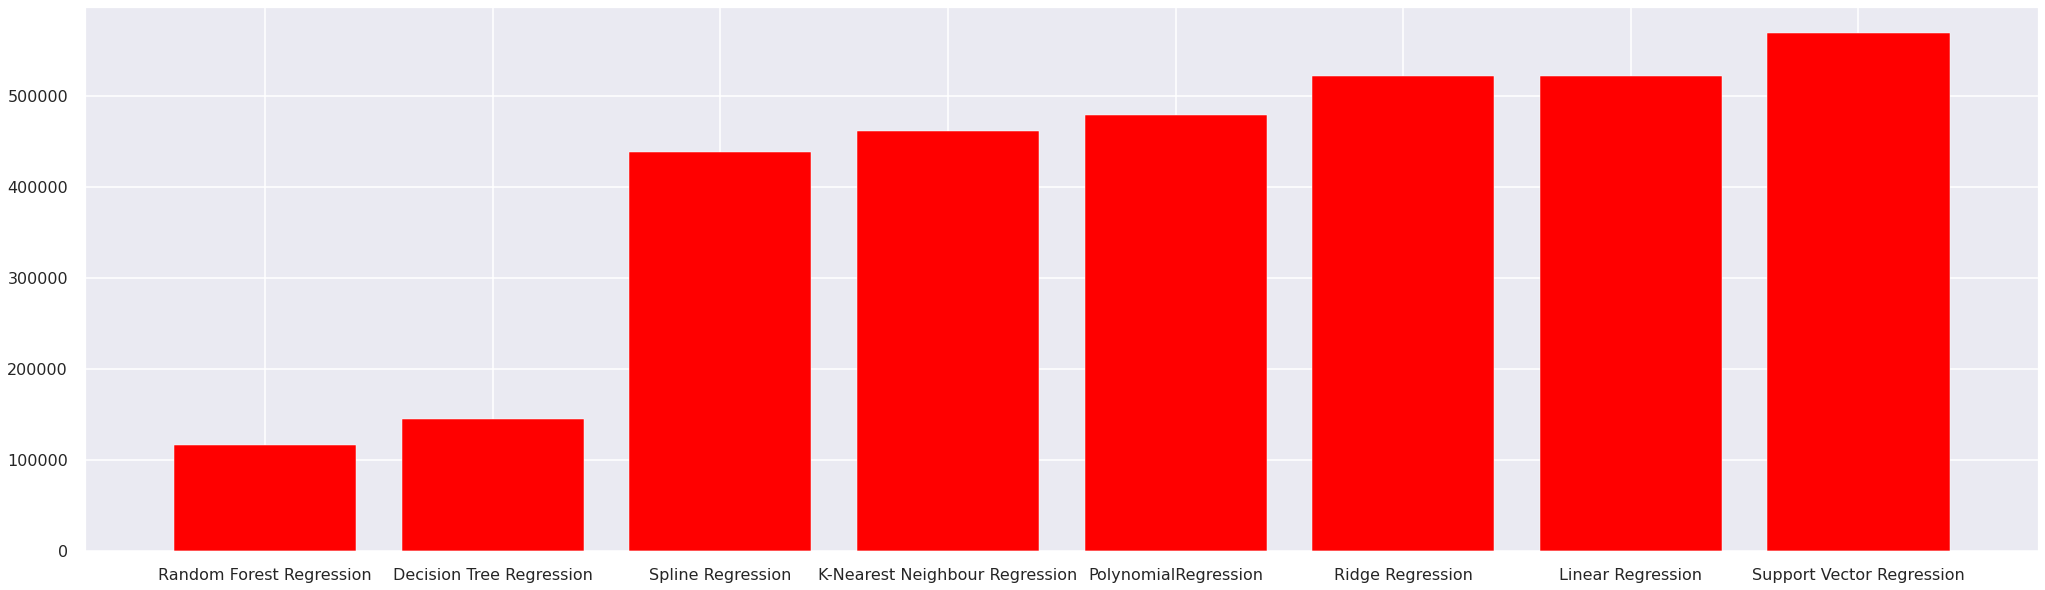

In [ ]:
names=['Random Forest Regression','Decision Tree Regression','Spline Regression','K-Nearest Neighbour Regression',
       'PolynomialRegression','Ridge Regression','Linear Regression','Support Vector Regression']
values=[116469.156004,144361.519285,437641.924339,460652.064212,478647.770043,520962.270174,520962.802146,568799.580050]
plt.figure(figsize=[35,10])
plt.bar(names,values, color='red')
plt.show()


In [ ]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales 
median_sale = sales['Weekly_Sales'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_sale), 2)
# print the result
print('The model has average percentage error of {}%'.format(percent_deviation))

The model has average percentage error of 12.27%


In [ ]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[2177586.64248001 1442085.02718     330261.16544    ...  924202.92043
  477930.83852     540187.03052   ]
